# Working with Outliers

In this repository, we will discuss how to identify and remove outliers from a dataset, a
process called trimming, and how to replace outliers by maximum or minimum values. We
will also discuss how to use the mean and standard deviation for normally distributed
variables or the inter-quartile range for skewed features or using percentiles, in a process 
commonly known as winsorization.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
Boston.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  CRIM_man  CRIM_log  
0       15.3  396.90   4.98  24.0  

Create a function that takes a dataframe, a variable name, and the factor to use in
the IQR calculation and returns the IQR proximity rule boundaries:

In [12]:
def find_boundaries(df, variable, distance):
 IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
 lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
 upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
 return upper_boundary, lower_boundary

Let's make a boxplot of the RM variable to visualize outliers. The outliers are the asterisks sitting outside the whiskers, which delimit the inter-quartile range proximity rule boundaries:

<AxesSubplot:xlabel='RM'>

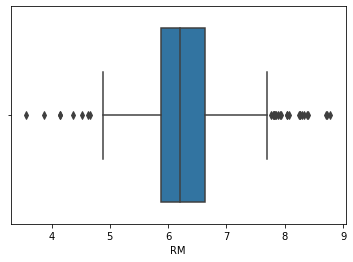

In [9]:
sns.boxplot(x = Boston['RM'])

 Let's use the function for the IQR calculation to determine the limits of the RM variable:

In [14]:
RM_upper_limit, RM_lower_limit = find_boundaries(Boston, 'RM', 1.5)

Let's print those limits beyond which we will consider a value an outlier:

In [15]:
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

 Let's create a Boolean vector to flag the outliers in RM:

In [18]:
outliers_RM = np.where(Boston['RM'] > RM_upper_limit, True, np.where(Boston['RM'] < RM_lower_limit, True, False))
outliers_RM

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Finally, let's remove the outliers from the dataset:

In [26]:
boston_trimmed = Boston.loc[~(outliers_RM)]
boston_trimmed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_man,CRIM_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.00632,0.006300
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.02731,0.026944
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.02729,0.026924
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.03237,0.031857
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.06905,0.066770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.06263,0.060747
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1.04527,0.044275
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1.06076,0.058986
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1.10959,0.103991


Visualize the distribution of the trimmed
variable and see whether there are outliers remaining. If there are, you can
adjust the boundaries and trim the data again, or try a different way of
finding the boundaries. As evident, some outliers remain

<AxesSubplot:xlabel='RM'>

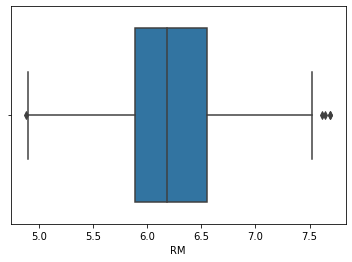

In [28]:
sns.boxplot(x = boston_trimmed['RM'])

## Find the outlier boundaries using the mean and standard deviation

In [37]:
def find_boundaries(df, variable, distance):
 lower_boundary = df[variable].mean() - (df[variable].std() * distance)
 upper_boundary = df[variable].mean() + (df[variable].std() * distance)
 return upper_boundary, lower_boundary

Calculate the boundaries for RM:

In [34]:
RM_upper_limit, RM_lower_limit = find_boundaries(Boston, 'RM', 3)

Let's create a Boolean vector to flag the outliers in RM:

In [40]:
outliers_RM = np.where(Boston['RM'] > RM_upper_limit, True, np.where(Boston['RM'] < RM_lower_limit, True, False))
outliers_RM

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Finally, let's remove the outliers from the dataset:

In [41]:
boston_trimmed = Boston.loc[~(outliers_RM)]
boston_trimmed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_man,CRIM_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.00632,0.006300
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.02731,0.026944
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.02729,0.026924
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.03237,0.031857
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.06905,0.066770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.06263,0.060747
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1.04527,0.044275
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1.06076,0.058986
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1.10959,0.103991


Alternatively, if we want to use quantiles to calculate the limits, we should write
the function like in the next step. Find the outlier boundaries using quantiles. The boundaries for RM for this functin can be calculated as follows: RM_upper_limit, RM_lower_limit = find_boundaries(Boston, 'RM')

In [36]:
def find_boundaries(df, variable):
 lower_boundary = df[variable].quantile(0.05)
 upper_boundary = df[variable].quantile(0.95)
 return upper_boundary, lower_boundary

## Remove Outliers Across Several Variables

Create a function that takes a dataframe, a variable name, and the factor to use in
the IQR calculation and returns the IQR proximity rule boundaries:

In [47]:
def find_boundaries(df, variable, distance):
 IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
 lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
 upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
 return upper_boundary, lower_boundary

 Visualise the RM, LSTAT and CRIM variables in a boxplot. First, select the relevant variables

In [43]:
df_2 = Boston[['RM', 'LSTAT', 'CRIM']]

<AxesSubplot:>

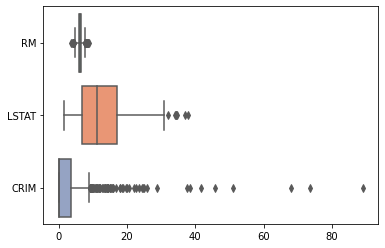

In [44]:
sns.boxplot(data = df_2, orient = "h", palette = "Set2")

Let's calculate the boundaries for the RM, LSTAT, and CRIM variables

In [46]:
RM_upper_limit, RM_lower_limit = find_boundaries(Boston, 'RM', 1.5) 
LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(Boston, 'LSTAT', 1.5) 
CRIM_upper_limit, CRIM_lower_limit = find_boundaries(Boston, 'CRIM', 1.5)

Let's create Boolean vectors that flag the outliers for each one of RM, LSTAT, and
CRIM:

In [50]:
outliers_RM = np.where(Boston['RM'] > RM_upper_limit, True, np.where(Boston['RM'] < RM_lower_limit, True, False))
outliers_LSTAT = np.where(Boston['LSTAT'] > LSTAT_upper_limit, True, np.where(Boston['LSTAT'] < LSTAT_lower_limit, True, False))
outliers_CRIM = np.where(Boston['CRIM'] > CRIM_upper_limit, True, np.where(Boston['CRIM'] < CRIM_lower_limit, True, False))

Finally, let's remove the observations with outliers in any of the variables:

In [52]:
boston_trimmed = Boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM)]

As evident in the plot below, outliers remain in the CRIM variable even after trimming in this manner. Further work to remove outliers is needed.

<AxesSubplot:>

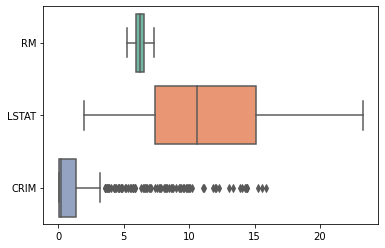

In [55]:
df_2 = boston_trimmed[['RM', 'LSTAT', 'CRIM']]
sns.boxplot(data = df_2, orient = "h", palette = "Set2")

# Performing winsorization

Winsorization, or winsorizing, is the process of transforming the data by limiting the
extreme values, that is, the outliers, to a certain arbitrary value, closer to the mean of the
distribution. Winsorizing is different from trimming because the extreme values are not
removed, but are instead replaced by other values. A typical strategy involves setting
outliers to a specified percentile. For example, with 90% winsorization, we set all data below the 5th percentile to the value at the 5th percentile and all data above the 95th percentile to the value at the 95th percentile.
Winsorization is symmetric; therefore, the winsorized mean of a symmetric distribution
provides an unbiased representation of the distribution of the variable. Here, we
will perform winsorization using pandas, NumPy, and Feature-engine.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # for QQ Plots
from feature_engine.outliers import Winsorizer

In [57]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [114]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Let's make a function to winsorize a variable to arbitrary upper and lower limits:

In [86]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

Remember that it is good practice to separate the data into training and
testing sets and train Winsorizer on the train set. This way, the
transformer will use the percentiles learned from the train set to cap the
variables in train, test, and all future data. Let's winsorize on the RM variable:

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
 Boston.drop('RM', axis = 1), Boston['RM'], test_size = 0.3,
 random_state = 0)

Function to create histogram, Q-Q plot and boxplot. Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution

In [80]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize = (16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30, kde = True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

Let's find outliers in RM

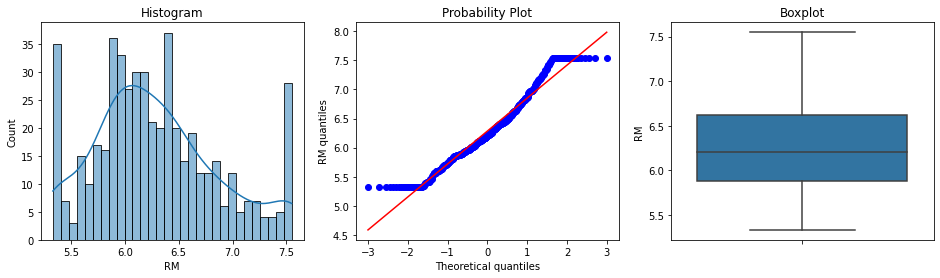

In [120]:
# visualise outliers in RM

diagnostic_plots(Boston, 'RM')

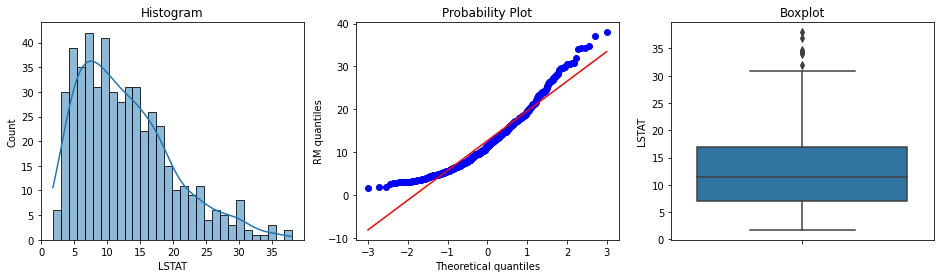

In [82]:
# visualise outliers in LSTAT

diagnostic_plots(Boston, 'LSTAT')

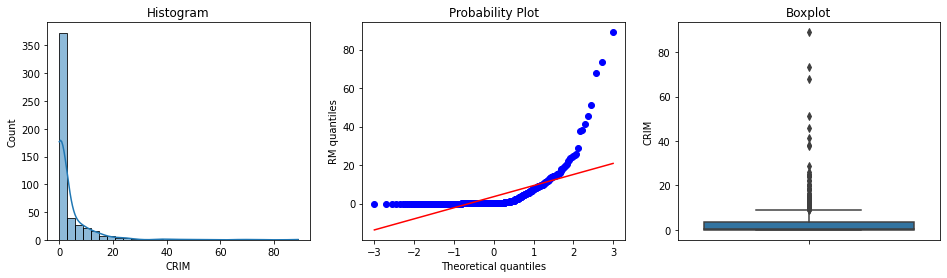

In [83]:
# outliers in CRIM

diagnostic_plots(Boston, 'CRIM')

In [87]:
# Now let's replace the outliers by the percentiles

Boston['RM'] = winsorise(Boston, 'RM', Boston['RM'].quantile(0.95), Boston['RM'].quantile(0.05))
Boston['LSTAT'] = winsorise(Boston, 'LSTAT', Boston['LSTAT'].quantile(0.95), Boston['LSTAT'].quantile(0.05))
Boston['CRIM'] = winsorise(Boston, 'CRIM', Boston['CRIM'].quantile(0.95), Boston['CRIM'].quantile(0.05))

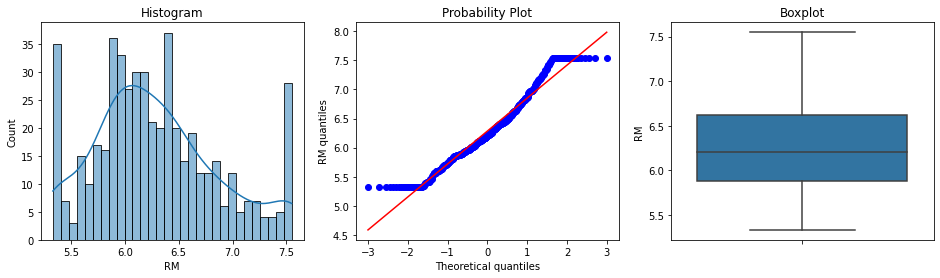

In [88]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(Boston, 'RM')

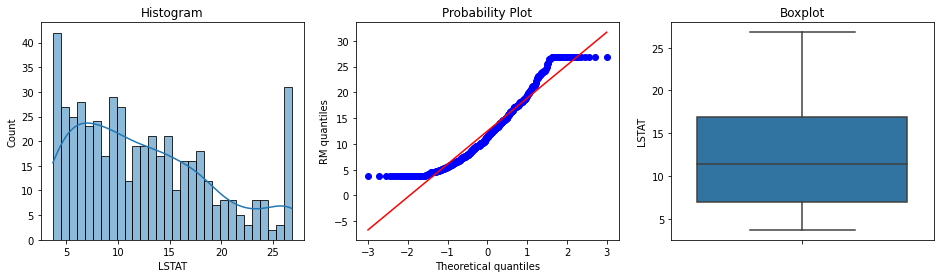

In [89]:
diagnostic_plots(Boston, 'LSTAT')

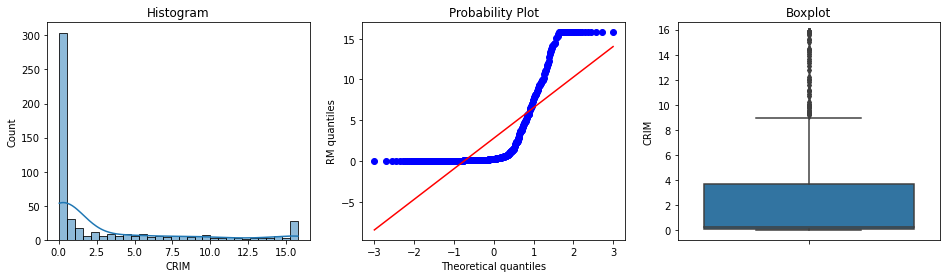

In [91]:
diagnostic_plots(Boston, 'CRIM')

## Winorize Several Variables at the same time

Set up a Feature-engine Winsorizer indicating which variables we want to
winsorize. The Fold parameter is the percentile on each tail that should be censored. For example, if fold = 0.05, the limits will be the 5th and 95th percentiles. If fold=0.1, the limits will be the 10th and 90th percentiles.

In [123]:
windsorizer = Winsorizer(capping_method = 'quantiles', fold = 0.05, tail = 'both', variables = ['LSTAT', 'CRIM'])

Fit windsorizer to the data so that it learns the percentiles:

In [124]:
windsorizer.fit(X_train)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['LSTAT', 'CRIM'])

Winsorize the LSTAT, and CRIM variables:

In [125]:
# transform the data
boston_t = windsorizer.transform(X_train)
boston_t = windsorizer.transform(X_test)

We can inspect the 5th percentiles learned by winsorizer like in the next step.
Inspect the learned 5th 5. percentiles:

In [126]:
windsorizer.left_tail_caps_

{'LSTAT': 3.7075, 'CRIM': 0.027909999999999997}

And we can inspect the 95th percentiles learned by windsorizer like in the next
step. Inspect the learned 95th 6. percentiles:

In [127]:
windsorizer.right_tail_caps_

{'LSTAT': 26.4305, 'CRIM': 15.077229999999995}

## Capping the variable at arbitrary maximum and minimum values

Similarly to winsorization, we can replace the extreme values by values closer to other
values in the variable, by determining the maximum and minimum boundaries with the
mean plus or minus the standard deviation, or the inter-quartile range proximity rule. This
procedure is also called bottom and top coding, censoring, or capping. We can cap both
extremes of the distribution or just one of the tails, depending on where we find the outliers
in the variable. Here, we will replace extreme values by the mean and standard
deviation or the inter-quartile range proximity rule, using pandas, NumPy, and Feature-engine.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import ArbitraryOutlierCapper

In [129]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Let's make a function to find the limits using the inter-quartile range proximity rule:

In [132]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

If, instead, we wanted to find the boundaries with the mean and standard
deviation, we can rewrite our function as follows. Let's make a function to find the limits using the mean and the standard
deviation. If the variable is not normally distributed, it may be more useful to use the
inter-quartile range proximity rule to find the outliers.  I will continue by finding
the limits using the mean and standard deviation.  

In [133]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

Let's find the boundaries for the RM, LSTAT, and CRIM variables:

In [134]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_normal_boundaries(Boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597748, 4.176782957105809)

In [135]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_normal_boundaries(Boston, 'LSTAT', 3)
LSTAT_upper_limit, LSTAT_lower_limit

(34.07624777515244, -8.770121292938992)

In [136]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_normal_boundaries(Boston, 'CRIM', 3)
CRIM_upper_limit, CRIM_lower_limit

(29.41815887330972, -22.19111175868521)

Next, we can go ahead and replace extreme values by those boundaries. Replace extreme values by the limits in RM:

In [138]:
# Now let's replace the outliers by the maximum and minimum limit

Boston['RM'] = np.where(Boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(Boston['RM'] < RM_lower_limit, RM_lower_limit, Boston['RM']))

In [139]:
# Now let's replace the outliers by the maximum and minimum limit

Boston['LSTAT'] = np.where(Boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(Boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, Boston['LSTAT']))

In [140]:
# Now let's replace the outliers by the maximum and minimum limit

Boston['CRIM'] = np.where(Boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(Boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, Boston['CRIM']))

To cap values only at the higher or lower end of the distribution, we can
change the code in to Boston['RM'] = np.where(Boston['RM'] RM_upper_limit, Boston['RM']) to cap the right tail
or Boston['RM'] = np.where(Boston['RM'] < RM_lower_limit, RM_lower_limit, Boston['RM']) to cap the left tail.

## Cap Many Variables at once

We can cap many variables at a time, utilizing the open source package, Feature-engine. To
do this, we need to load the libraries and the data as we did in earlier steps. Next, we need to import Feature-engine. Set up a Feature-engine Winsorizer indicating which variables we want to
winsorize and that we want to use the mean and standard deviation to find the
limits

In [142]:
windsorizer = Winsorizer(capping_method = 'quantiles', tail = 'both', fold = 0.05, variables = ['RM', 'LSTAT', 'CRIM'])

With Winsorizer from Feature-engine, we can replace the values by the
mean and standard deviation setting the argument distribution to
gaussian or the inter-quartile range proximity rule by setting the
distribution to skewed. We can also replace outliers at both ends of the
distributions or just the left or right tails, by setting the tail to both,
left, or right. The fold argument works as the distance argument in
the functions. Fit windsorizer to the data so that it learns the limits:

In [143]:
windsorizer.fit(oston)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

Winsorize the RM, LSTAT, and CRIM variables:

In [144]:
boston_t = windsorizer.transform(Boston)

We can inspect the lower boundaries learned by winsorizer like in the next step. Inspect the learned lower boundaries:

In [145]:
windsorizer.left_tail_caps_

{'RM': 5.314, 'LSTAT': 3.7075, 'CRIM': 0.027909999999999997}

And we can inspect the upper limits learned by winsorizer like in the next step. windsorizer.right_tail_caps_

# Tukey’s box plot method

The great advantage of Tukey’s box plot method is that the statistics (e.g. IQR, inner and outer fence) are robust to outliers, meaning to find one outlier is independent of all other outliers. Also, the statistics are easy to calculate. Furthermore, this method does not require a normal distribution of the data, which is often not guaranteed in real-life settings. If a distribution is highly skewed (usually found in real-life data), the Tukey method can be extended to the log-IQ method. Here, each value is transformed to its logarithm before calculating the inner and outer fences.

In [147]:
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

[]
[]


C:\Users\Nicholas\anaconda3\envs\Fatalities_Prediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


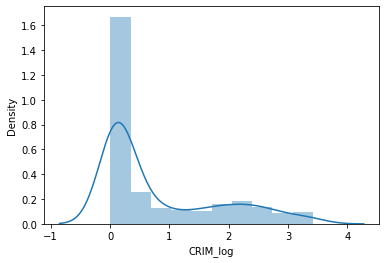

In [149]:
#Transform 'CRIM' to log 
log_CRIM = np.log(Boston['CRIM'])
Boston['CRIM_man'] = Boston['CRIM']+1
log_CRIM = np.log(Boston['CRIM_man'])
Boston['CRIM_log'] = log_CRIM

#Plot
sns.distplot(Boston['CRIM_log'])

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(Boston, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

In [20]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(Boston, "CRIM")

In [21]:
print(probable_outliers_tm)

[374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]


## Transform 'CRIM' to log 

[]
[380, 404, 405, 410, 414, 418]


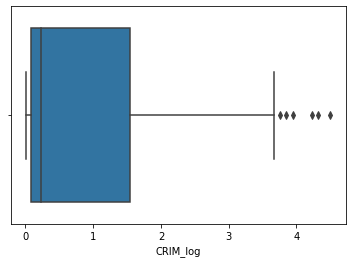

In [22]:
log_CRIM = np.log(Boston['CRIM'])
Boston['CRIM_man'] = Boston['CRIM']+1
log_CRIM = np.log(Boston['CRIM_man'])
Boston['CRIM_log'] = log_CRIM

# Plot
sns.boxplot(x = Boston['CRIM_log'])

# Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(Boston, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)